In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

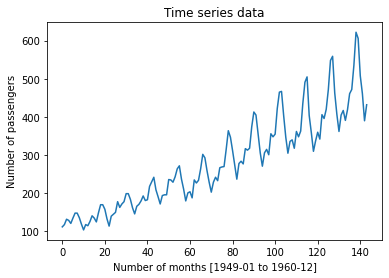

In [4]:
# Importing the passenger data from Airline passenger
data=pd.read_csv("airline-passengers.csv",usecols=[1])
plt.title("Time series data")
plt.xlabel("Number of months [1949-01 to 1960-12]")
plt.ylabel("Number of passengers")
plt.plot(data)
plt.show()

**b)Explain the short-term and long-term temporal patterns that you see
in the data considering that this is the monthly number of airline passengers.**

By the keen observation of graph and values of Airline passenger data [1949-01 to 1960-12] we can able to conclude the highest ever recorded number is at 1960-07(July)-622 passengers.
Increasing patterns are as follows

[November(11)- March(3)- ->(5 Months)]-**Long-term Temporal Pattern**

[June(6)- August(8)- ->(3 Months)]-**Short-term Temporal Pattern**

the months of April, May, September, October has the passenger fluctuations and are having low number of passengers when compared to the other months.Hence We can conclude  November- March as long term temporal pattern and June- August as the short term temporal pattern.


In [5]:
#fixing random seed 
np.random.seed(0)
# Converting into Float Data
data= data.astype('float64')
# Normalize the data to range (0; 1)
scaler=MinMaxScaler(feature_range=(0, 1))
data=scaler.fit_transform(data)
# Spliting train and test data
train,test= train_test_split(data, train_size=0.67,shuffle=False)

In [6]:
## Obtain the two-column input-output dataset to be used in LSTM
shiftrate=1
x_train= []
y_train = []
for i in range(len(train)-shiftrate-1):
    x_train.append(train[i:(i+shiftrate),0])
    y_train.append(train[i+shiftrate,0])

x_test= []
y_test = []
for i in range(len(test)-shiftrate-1):
    x_test.append(test[i:(i+shiftrate),0])
    y_test.append(test[i+shiftrate,0])

In [7]:
## Converting list into array
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
## Reshape function in numpy with (Xtrain.shape[0], 1, Xtrain.shape[1])
x_train =np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test =np.reshape(x_test,(x_test.shape[0], 1 ,x_test.shape[1]))

In [8]:
## Building LSTM network
model = Sequential()
model.add(LSTM(4,activation='sigmoid', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.5873 - 1s/epoch - 14ms/step
Epoch 2/100
94/94 - 0s - loss: 0.3302 - 148ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.1820 - 136ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0996 - 142ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0555 - 147ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0334 - 145ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0232 - 128ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0188 - 151ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0171 - 129ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0166 - 136ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0162 - 133ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0161 - 126ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0161 - 156ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0160 - 130ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0158 - 141ms/epoch - 1ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0158 - 128ms/epoc

In [9]:
## Calculating Predictions
predtrain = model.predict(x_train)
predtest = model.predict(x_test)

predtrain = scaler.inverse_transform(predtrain)
predtest = scaler.inverse_transform(predtest)

## Shaping train data
y_train=y_train.reshape(-1,1)
y_train = scaler.inverse_transform(y_train)

## Shaping test data
y_test=y_test.reshape(-1,1)
y_test= scaler.inverse_transform(y_test)

In [10]:
# root-mean-squared-error (RMSE) in training data
trainScore = math.sqrt(mean_squared_error(y_train, predtrain[:,0]))
print('RMSE Train Score: ',round(trainScore))

# root-mean-squared-error (RMSE) in testing data
testScore = math.sqrt(mean_squared_error(y_test, predtest[:,0]))
print('RSME Test Score: ' ,round(testScore))

RMSE Train Score:  23
RSME Test Score:  65


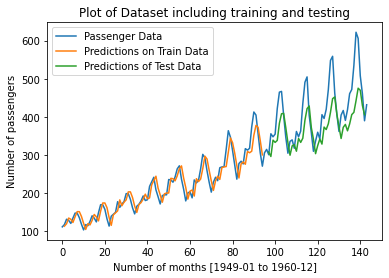

In [11]:
# Aligning Test and Train predictions
shiftrate=1
Predict_trainPlot = np.empty_like(data)
Predict_trainPlot[:, :] = np.nan
Predict_trainPlot[shiftrate:len(predtrain)+shiftrate, :] = predtrain
Predict_testPlot = np.empty_like(data)
Predict_testPlot[:, :] = np.nan
Predict_testPlot[len(predtrain)+(shiftrate*2)+1:len(data)-1, :]= predtest

#Plotting the actual and predicted values for the entire dataset including training and testing.
plt.title('Plot of Dataset including training and testing')
plt.plot(scaler.inverse_transform(data),label='Passenger Data')
plt.plot(Predict_trainPlot,label='Predictions on Train Data')
plt.plot(Predict_testPlot,label='Predictions of Test Data')

# Labelling Data on plot
plt.legend(('Passenger Data ','Predictions on Train Data','Predictions of Test Data'))
plt.xlabel("Number of months [1949-01 to 1960-12]")
plt.ylabel("Number of passengers")
plt.show()